In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")

In [2]:
matches = pd.read_csv('C:/Users/Hp/Desktop/WPL/matches.csv')
deliveries = pd.read_csv('C:/Users/Hp/Desktop/WPL/deliveries.csv')

In [3]:
all_matches = matches[(matches['team1'].isin(['Chennai Super Kings', 'Rajasthan Royals'])) & (matches['team2'].isin(['Chennai Super Kings', 'Rajasthan Royals']))]

In [4]:
data = pd.merge(matches, deliveries, how = "inner", left_on = 'id', right_on = 'match_id')

In [5]:
sub_data = data[(data['team1'].isin(['Chennai Super Kings', 'Rajasthan Royals'])) & (data['team2'].isin(['Chennai Super Kings', 'Rajasthan Royals']))]

### Who will win the match??

In [6]:
all_matches.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
82,83,2008,Jaipur,5/4/2008,Chennai Super Kings,Rajasthan Royals,Chennai Super Kings,bat,normal,0,Rajasthan Royals,0,8,Sohail Tanvir,Sawai Mansingh Stadium,Asad Rauf,AV Jayaprakash,NaN
109,110,2008,Chennai,5/24/2008,Rajasthan Royals,Chennai Super Kings,Rajasthan Royals,bat,normal,0,Rajasthan Royals,10,0,JA Morkel,"MA Chidambaram Stadium, Chepauk",DJ Harper,SL Shastri,NaN
116,117,2008,Mumbai,6/1/2008,Chennai Super Kings,Rajasthan Royals,Rajasthan Royals,field,normal,0,Rajasthan Royals,0,3,YK Pathan,Dr DY Patil Sports Academy,BF Bowden,RE Koertzen,NaN
136,137,2009,Centurion,4/30/2009,Chennai Super Kings,Rajasthan Royals,Rajasthan Royals,field,normal,0,Chennai Super Kings,38,0,SK Raina,SuperSport Park,GAV Baxter,RE Koertzen,NaN
151,152,2009,Kimberley,5/9/2009,Rajasthan Royals,Chennai Super Kings,Rajasthan Royals,bat,normal,0,Chennai Super Kings,0,7,S Badrinath,De Beers Diamond Oval,GAV Baxter,HDPK Dharmasena,NaN


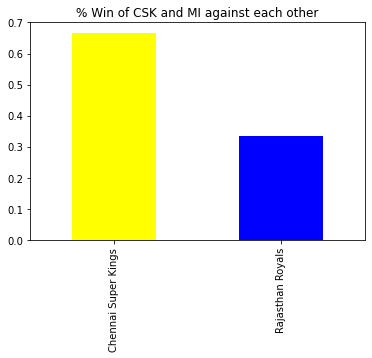

In [7]:
all_matches['winner'].value_counts(normalize=True).plot.bar(title='% Win of CSK and MI against each other', color = ['Yellow', 'Blue'])

In [8]:
all_matches.groupby('season')['winner'].value_counts()

season  winner             
2008    Rajasthan Royals       3
2009    Chennai Super Kings    2
2010    Chennai Super Kings    1
        Rajasthan Royals       1
2011    Chennai Super Kings    2
2012    Chennai Super Kings    2
2013    Chennai Super Kings    1
        Rajasthan Royals       1
2014    Chennai Super Kings    2
2015    Chennai Super Kings    1
        Rajasthan Royals       1
2018    Chennai Super Kings    1
        Rajasthan Royals       1
2019    Chennai Super Kings    2
Name: winner, dtype: int64

In [9]:
all_matches.groupby(['city'])['winner'].value_counts()

city       winner             
Ahmedabad  Rajasthan Royals       2
Centurion  Chennai Super Kings    1
Chennai    Chennai Super Kings    6
           Rajasthan Royals       1
Jaipur     Chennai Super Kings    3
           Rajasthan Royals       3
Kimberley  Chennai Super Kings    1
Mumbai     Rajasthan Royals       1
Pune       Chennai Super Kings    1
Ranchi     Chennai Super Kings    1
Name: winner, dtype: int64

In [10]:
all_matches.groupby(['toss_decision', 'toss_winner'])['winner'].value_counts(normalize=True)

toss_decision  toss_winner          winner             
bat            Chennai Super Kings  Rajasthan Royals       0.600000
                                    Chennai Super Kings    0.400000
               Rajasthan Royals     Chennai Super Kings    0.714286
                                    Rajasthan Royals       0.285714
field          Chennai Super Kings  Chennai Super Kings    1.000000
               Rajasthan Royals     Chennai Super Kings    0.714286
                                    Rajasthan Royals       0.285714
Name: winner, dtype: float64

when CSK elected to bowl first is successfully able to defend the total. On the other hand RR is not able to defend the target most often.

In [11]:
pd.crosstab(all_matches['toss_decision'], all_matches['winner'])

winner,Chennai Super Kings,Rajasthan Royals
toss_decision,,
bat,7,5
field,7,2


In [12]:
pd.crosstab(all_matches['toss_winner'], all_matches['winner'])

winner,Chennai Super Kings,Rajasthan Royals
toss_winner,,
Chennai Super Kings,4,3
Rajasthan Royals,10,4


It can be seen that when RR wins the toss it has higher chances of winning the match.

In [13]:
all_matches.groupby('winner')['win_by_runs', 'win_by_wickets'].max()

,win_by_runs,win_by_wickets
winner,,
Chennai Super Kings,64,8
Rajasthan Royals,17,8


In [14]:
all_matches.groupby(['season', 'winner'])['player_of_match'].value_counts()

season  winner               player_of_match
2008    Rajasthan Royals     JA Morkel          1
                             Sohail Tanvir      1
                             YK Pathan          1
2009    Chennai Super Kings  S Badrinath        1
                             SK Raina           1
2010    Chennai Super Kings  M Vijay            1
        Rajasthan Royals     NV Ojha            1
2011    Chennai Super Kings  M Vijay            1
                             MEK Hussey         1
2012    Chennai Super Kings  BW Hilfenhaus      1
                             F du Plessis       1
2013    Chennai Super Kings  MEK Hussey         1
        Rajasthan Royals     SR Watson          1
2014    Chennai Super Kings  RA Jadeja          2
2015    Chennai Super Kings  RA Jadeja          1
        Rajasthan Royals     AM Rahane          1
2018    Chennai Super Kings  SR Watson          1
        Rajasthan Royals     JC Buttler         1
2019    Chennai Super Kings  MS Dhoni           2
Name:

In [15]:
sub_data1 = sub_data[sub_data['player_of_match'].isin(['RA Jadeja', 'JC Buttler', 'MS Dhoni', 'SR Watson'])]

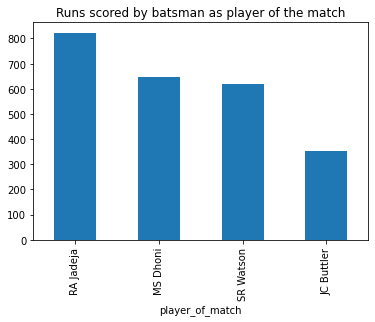

In [16]:
sub_data1.groupby('player_of_match')['batsman_runs'].sum().sort_values(ascending=False).plot.bar(title='Runs scored by batsman as player of the match')

In [17]:
sub_data1[sub_data1['bowler'] == sub_data1['player_of_match']].groupby('bowler')['player_dismissed'].agg({'count'})

,count
bowler,
RA Jadeja,11
SR Watson,2


In [18]:
sub_data1[sub_data1['bowler'] == 'RA Jadeja'].groupby('bowler')['player_dismissed'].value_counts()

bowler     player_dismissed
RA Jadeja  SPD Smith           3
           AM Rahane           2
           SR Watson           2
           DJ Hooda            1
           JP Faulkner         1
           KK Nair             1
           RA Tripathi         1
           STR Binny           1
           SV Samson           1
           TG Southee          1
Name: player_dismissed, dtype: int64

### How many runs will RR score in the first 6 overs?

In [19]:
sub_data2 = sub_data[(sub_data['over'].isin([1,2,3,4,5,6])) & (sub_data['batting_team'] == 'Rajasthan Royals') & (sub_data['season'] > 2015)]

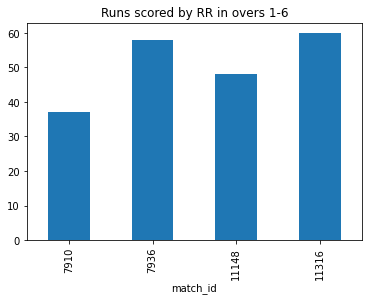

In [20]:
sub_data2.groupby('match_id')['total_runs'].sum().plot.bar(title='Runs scored by RR in overs 1-6')

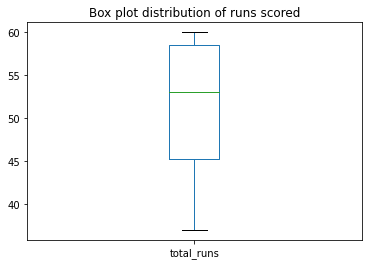

In [21]:
sub_data2.groupby('match_id')['total_runs'].sum().plot.box(title='Box plot distribution of runs scored')

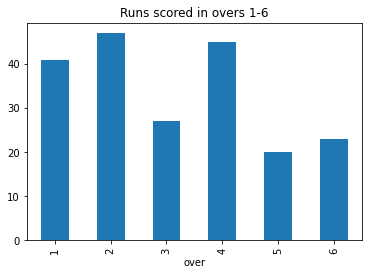

In [22]:
sub_data2.groupby('over')['total_runs'].sum().plot.bar(title='Runs scored in overs 1-6')

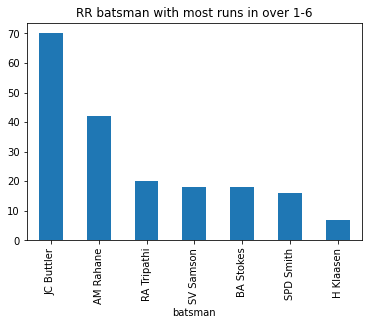

In [23]:
sub_data2.groupby('batsman')['batsman_runs'].sum().sort_values(ascending=False).plot.bar(title='RR batsman with most runs in over 1-6')

In [24]:
sub_data2.groupby('bowler')['player_dismissed'].value_counts()

bowler           player_dismissed
DL Chahar        AM Rahane           3
                 SV Samson           2
Harbhajan Singh  BA Stokes           1
M Santner        SV Samson           1
RA Jadeja        AM Rahane           1
SN Thakur        JC Buttler          2
                 H Klaasen           1
Name: player_dismissed, dtype: int64

### What will Deepak Cahal Economy rate be?

In [25]:
sub_data3 = sub_data[sub_data['bowler'] == 'DL Chahar']

In [26]:
overs = sub_data3['over'].value_counts().sum()

In [27]:
runs = sub_data3['total_runs'].sum()

In [28]:
print('Overall economy rate of Deepak Chahar is : {}'.format(round(runs/overs, 2)))

Overall economy rate of Deepak Chahar is : 1.16


In [29]:
match_over = np.floor(sub_data3.groupby(['match_id', 'over'])['over'].agg({'count'}).groupby('match_id')['count'].sum()/6).tolist()

In [30]:
match_runs = sub_data3.groupby('match_id')['total_runs'].sum().tolist()

In [31]:
print("Average economy rate of Deepak Chahar in all matches against RR is : {}".format(round(np.mean(np.array(match_runs)/np.array(match_over)), 2)))

Average economy rate of Deepak Chahar in all matches against RR is : 7.42


In [32]:
sub_data4 = data[data['bowler'] == 'DL Chahar']

In [33]:
all_overs = sub_data4['over'].value_counts().sum()

In [34]:
all_runs = sub_data4['total_runs'].sum()

In [35]:
print('Overall economy rate of D Chahar against all team is : {}'.format(round((all_runs/all_overs), 2)))

Overall economy rate of D Chahar against all team is : 1.27


In [36]:
all_match_overs = np.floor(sub_data4.groupby(['match_id', 'over'])['over'].agg({'count'}).groupby('match_id')['count'].sum()/6).tolist()

In [37]:
all_match_runs = sub_data4.groupby('match_id')['total_runs'].sum().tolist()

In [38]:
print("Average economy rate of Deepak Chahar in all matches against all oppositions is : {}".format(round(np.mean(np.array(all_match_runs)/np.array(all_match_overs)), 2)))

Average economy rate of Deepak Chahar in all matches against all oppositions is : 8.51


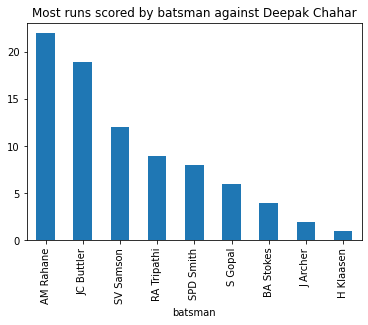

In [39]:
sub_data[sub_data['bowler'] == 'DL Chahar'].groupby('batsman')['batsman_runs'].sum().sort_values(ascending=False).plot.bar(title='Most runs scored by batsman against Deepak Chahar')

### How many wickets will Jofra Archer take in the death?

In [66]:
sub_data5 = data[(data['bowler'] == 'J Archer') & (data['over']>=16)]

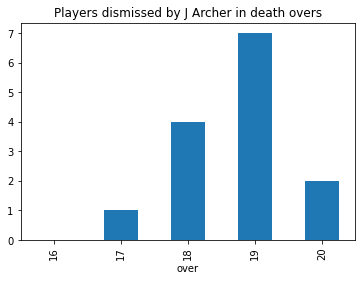

In [67]:
sub_data5.groupby('over')['player_dismissed'].agg("count").plot.bar(title = 'Players dismissed by J Archer in death overs')

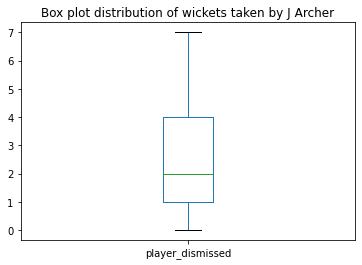

In [68]:
sub_data5.groupby('over')['player_dismissed'].agg("count").plot.box(title='Box plot distribution of wickets taken by J Archer')

In [69]:
sub_data5['player_dismissed'].value_counts().sort_values(ascending=False)

HH Pandya          2
PA Patel           1
MJ McClenaghan     1
Mandeep Singh      1
GJ Maxwell         1
Q de Kock          1
DJ Bravo           1
Rashid Khan        1
KA Pollard         1
KH Pandya          1
N Pooran           1
YK Pathan          1
Shakib Al Hasan    1
Name: player_dismissed, dtype: int64

In [70]:
sub_data6 = sub_data[(sub_data['bowler'] == 'J Archer') & (sub_data['over']>=16)]

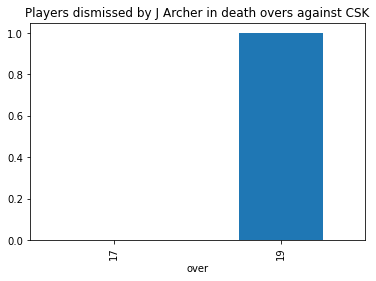

In [71]:
sub_data6.groupby('over')['player_dismissed'].agg("count").plot.bar(title = 'Players dismissed by J Archer in death overs against CSK')

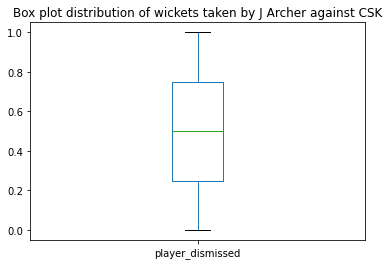

In [72]:
sub_data6.groupby('over')['player_dismissed'].agg("count").plot.box(title='Box plot distribution of wickets taken by J Archer against CSK')

In [73]:
sub_data6['player_dismissed'].value_counts()

DJ Bravo    1
Name: player_dismissed, dtype: int64

### What will Steve Smith's strike rate be during the match?

In [74]:
sub_data7 = data[data['batsman'] == 'SPD Smith']

In [75]:
balls_faced = sub_data7['ball'].count()

In [50]:
runs_scored = sub_data7['batsman_runs'].sum()

In [51]:
print('Strike rate of Steve Smith against all the bowlers is : {}'.format(round((runs_scored/balls_faced)*100,2)))

Strike rate of Steve Smith against all the bowlers is : 126.67


In [52]:
all_matches_balls_faced = np.array(sub_data7.groupby('match_id')['ball'].count())

In [53]:
all_matches_runs_scored = np.array(sub_data7.groupby('match_id')['batsman_runs'].sum())

In [54]:
index_match = np.array(np.array(sub_data7.groupby('match_id')['ball'].count().index))

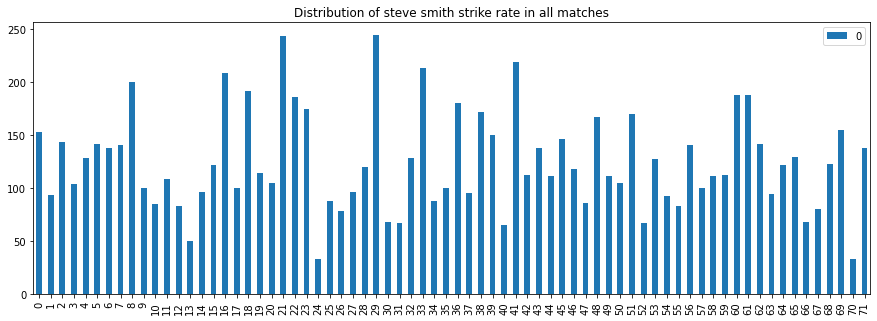

In [57]:
pd.DataFrame((all_matches_runs_scored/all_matches_balls_faced)*100).plot.bar(title = 'Distribution of steve smith strike rate in all matches', figsize=(15,5))

In [58]:
sub_data8 = sub_data[sub_data['batsman'] == 'SPD Smith']

In [59]:
csk_ball_faced = sub_data8['ball'].count()

In [60]:
csk_run_scored = sub_data8['batsman_runs'].sum()

In [61]:
print('Strike rate of Steve Smith against CSK bowlers is : {}'.format(round((csk_run_scored/csk_ball_faced)*100,2)))

Strike rate of Steve Smith against CSK bowlers is : 87.5


In [62]:
sub_data8.groupby('bowler')['player_dismissed'].value_counts()

bowler       player_dismissed
DJ Bravo     SPD Smith           1
Imran Tahir  SPD Smith           1
MM Sharma    SPD Smith           1
RA Jadeja    SPD Smith           3
Name: player_dismissed, dtype: int64

In [63]:
sub_data8.groupby('bowler')['batsman_runs'].sum()

bowler
DJ Bravo        6
DL Chahar       8
IC Pandey       1
Imran Tahir     9
M Santner       6
MM Sharma      16
P Negi          4
R Ashwin        4
RA Jadeja      18
SK Raina        3
SN Thakur       9
Name: batsman_runs, dtype: int64

In [64]:
sub_data8[sub_data8['batsman_runs'].isin([4, 6])]['batsman_runs'].value_counts()

4    5
Name: batsman_runs, dtype: int64

In [65]:
sub_data8[sub_data8['batsman_runs'].isin([4, 6])].groupby('bowler')['batsman_runs'].value_counts()

bowler     batsman_runs
DL Chahar  4               1
MM Sharma  4               1
RA Jadeja  4               1
SN Thakur  4               2
Name: batsman_runs, dtype: int64